In [1]:
from functions import *
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt 
import math

## Question 1

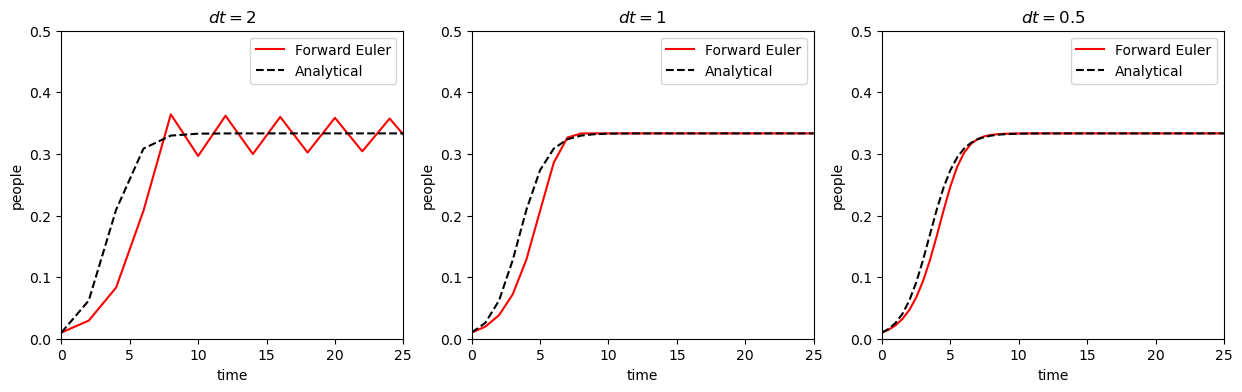

In [3]:
# 1a
S0 = 0.99; I0 = 0.01;
gamma = 2; beta = 3;
R0 = beta/gamma;
deltas = [2,1,0.5]

fig,[ax0,ax1,ax2] = plt.subplots(1,3,figsize=(15,4))
for ii,dt in enumerate(deltas):
    ax_name = "ax"+str(ii)
    ax = globals()[ax_name]
    tvals = np.arange(start=0,stop=25+dt,step=dt)
    
    # find closed form solution
    ansol = [(1 - 1/R0) / (1 + ((1-1/R0-I0)/I0) * math.exp(-(beta-gamma)*t))\
             for t in tvals]

    # simulate using forward euler with dt from deltas
    S,I = SIS_solver(S0,I0,beta,gamma,tvals)

    Inf ,= ax.plot(tvals,I,c="r")
    Analyt ,= ax.plot(tvals,ansol,c="k",linestyle="dashed")
    ax.set_ylim([0,0.5]); ax.set_xlim([0,25])
    ax.set_ylabel("people"); ax.set_xlabel("time")
    ax.legend([Inf,Analyt],["Forward Euler", "Analytical"])
    ax.set_title(r"$dt = ${}".format(dt))
plt.show()

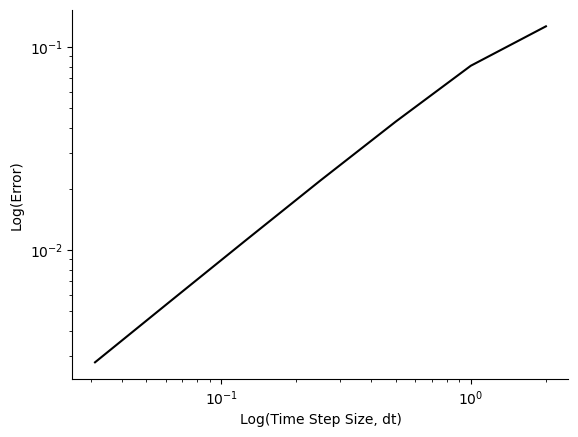

In [5]:
# 1d
S0 = 0.99; I0 = 0.01;
gamma = 2; beta = 3;
R0 = beta/gamma;
deltas = [1/32,1/16,1/8,1/4,1/2,1,2]

errors = []
for ii,dt in enumerate(deltas):
    tvals = np.arange(start=0,stop=25+dt,step=dt)
    
    # find closed form solution
    ansol = [(1 - 1/R0) / (1 + ((1-1/R0-I0)/I0) * math.exp(-(beta-gamma)*t))\
             for t in tvals]

    # simulate using forward euler with dt from deltas
    S,I = SIS_solver(S0,I0,beta,gamma,tvals)
    
    errors.append(calc_error(I,ansol,tvals))

    
fig,ax = plt.subplots()
ax.loglog(deltas,errors,c="k")
ax.set_xlabel("Log(Time Step Size, dt)"); ax.set_ylabel("Log(Error)")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

## Question 2

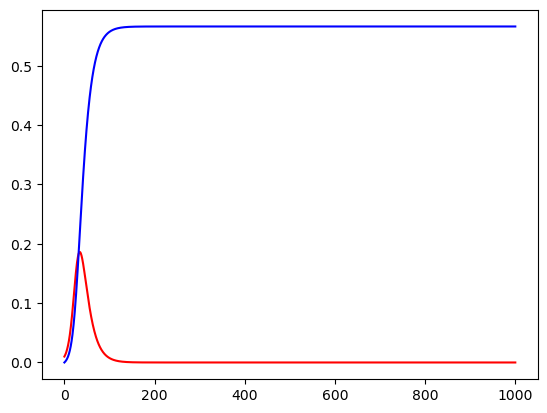

0.5663169305492218

In [17]:
#2b
VE = 0.8; prop_vax = 0.5;
I0 = 0.01; R0=0;
R_0 = 5; gamma = 1/14; beta = R_0*gamma;
dt = 0.5;
tvals = np.arange(start=0,stop=1000+dt,step=dt)

# All or Nothing Model
Vnull0 = (1-VE)*prop_vax; Vall0 = VE*prop_vax; S0 = 1 - (I0+Vnull0+Vall0)
S,I,R,Vnull,Vall = SIR_AoN_vax(S0,I0,R0,Vnull0,Vall0,beta,gamma,tvals)

fig,ax = plt.subplots()
Inf ,= ax.plot(tvals,I,c="r")
Rec ,= ax.plot(tvals,R,c="b")
plt.show()

R[-1]

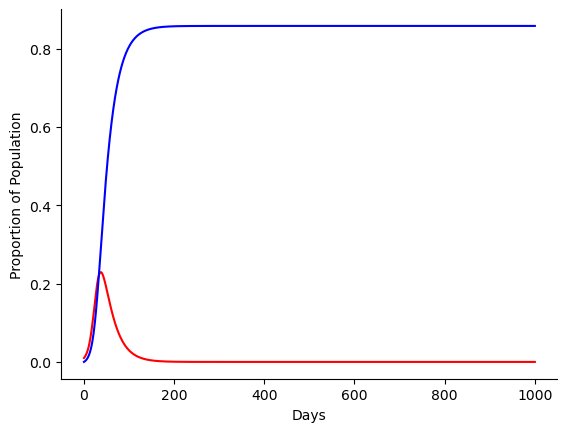

0.8578646213645389

In [9]:
VE = 0.8; prop_vax = 0.5;
I0 = 0.01; R0=0;
R_0 = 5; gamma = 1/14; beta = R_0*gamma;
dt = 0.5;
tvals = np.arange(start=0,stop=1000+dt,step=dt)

# Leaky model
V0 = prop_vax; S0 = 1 - (I0+V0)
S,I,R,V = SIR_Leaky_vax(S0,I0,R0,V0,VE,beta,gamma,tvals)

fig,ax = plt.subplots()
Inf ,= ax.plot(tvals,I,c="r")
Rec ,= ax.plot(tvals,R,c="b")
plt.show()

R[-1]

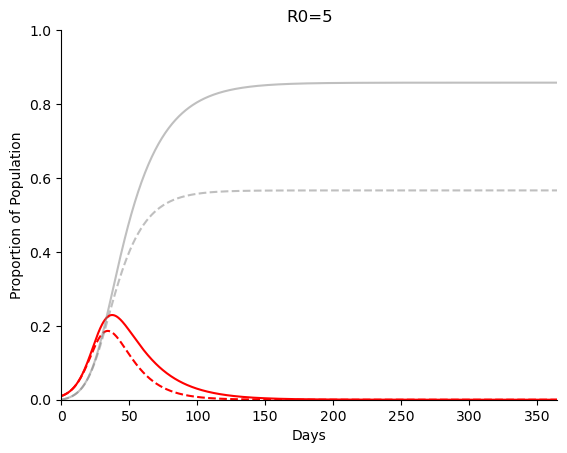

In [25]:
#2c
VE = 0.8; prop_vax = 0.5;
I0 = 0.01; R0=0;
R_0 = 5; gamma = 1/14; beta = R_0*gamma;
dt = 0.5;
tvals = np.arange(start=0,stop=365+dt,step=dt)

fig,ax = plt.subplots()

# All or Nothing Model
Vnull0 = (1-VE)*prop_vax; Vall0 = VE*prop_vax; S0 = 1 - (I0+Vnull0+Vall0)
S,I,R,Vnull,Vall = SIR_AoN_vax(S0,I0,R0,Vnull0,Vall0,beta,gamma,tvals)
Inf ,= ax.plot(tvals,I,c="r",linestyle='dashed')
Rec ,= ax.plot(tvals,R,c="gray",alpha=0.5,linestyle='dashed')
# Leaky model
V0 = prop_vax; S0 = 1 - (I0+V0)
S,I,R,V = SIR_Leaky_vax(S0,I0,R0,V0,VE,beta,gamma,tvals)
Inf ,= ax.plot(tvals,I,c="r")
Rec ,= ax.plot(tvals,R,c="gray",alpha=0.5)

ax.set_xlim(0,365); ax.set_ylim(0,1)
ax.set_xlabel("Days"); ax.set_ylabel("Proportion of Population")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.title("R0=5")
# ax.legend([Inf,Rec],["Currently Infected", "Total Infections"],loc="lower right")

plt.show()